Debadatta Das Mohapatra (66070798) 

Mukul Joshi (42384321)

Chinmay Jain (54565486)

Group Number: 3

In [ ]:
# importing all the libraries
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical learning
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy
import random
import math
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model, utils
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree

In [ ]:
# Loading all the datasets into data frames
fulldf = pd.read_csv('https://saref.github.io/teaching/BAIT509/mydata.csv').drop(columns='Unnamed: 0')
data_dict = pd.read_csv('https://saref.github.io/teaching/BAIT509/descriptions.csv')
populationdf = pd.read_csv('https://saref.github.io/teaching/BAIT509/populations.csv').drop(columns='Unnamed: 0')

1.1 Convert FIPS column to correct format [5 Marks]

In [ ]:
data_dict

,Unnamed: 0,Feature,Definition,Notes
0,0,State,NaN,NaN
1,1,AreaName,NaN,NaN
2,2,All_Poverty,Both male and female reported below poverty li...,NaN
3,3,M_Poverty,Males below poverty (Raw),NaN
4,4,F_Poverty,Females below poverty (Raw),NaN
5,5,FIPS,State + County FIPS (Raw),NaN
6,6,Med_Income,Med_Income all enthnicities (Raw),NaN
7,7,Med_Income_White,Med_Income white (Raw),NaN
8,8,Med_Income_Black,Med_Income black (Raw),NaN
9,9,Med_Income_Nat_Am,Med_Income native American (Raw),NaN


In [ ]:
type(fulldf['FIPS'][0])

numpy.int64

In [ ]:
fulldf['FIPS'] = fulldf['FIPS'].astype(str)

In [ ]:
# converting to the five digit format
fulldf['FIPS'] = fulldf['FIPS'].str.pad(5, side='left', fillchar='0')

1.2 Check for null values [5 Marks]

In [ ]:
# Checking for the null values
round(fulldf.isna().sum()*100/fulldf.shape[0],1)

State                   0.0
AreaName                0.0
All_Poverty             0.0
M_Poverty               0.0
F_Poverty               0.0
FIPS                    0.0
Med_Income              0.0
Med_Income_White        0.1
Med_Income_Black       38.6
Med_Income_Nat_Am      53.0
Med_Income_Asian       56.1
Med_Income_Hispanic    21.7
M_With                  0.0
M_Without               0.0
F_With                  0.0
F_Without               0.0
All_With                0.0
All_Without             0.0
Incidence_Rate          0.0
Avg_Ann_Incidence       0.0
Recent_Trend            0.0
Mortality_Rate          0.0
Avg_Ann_Deaths          0.0
dtype: float64

In [ ]:
# removing columns with more than 20% null values
fulldf.drop(['Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Med_Income_Hispanic'], axis = 1, inplace = True)

We dropped the 4 columns i.e. 'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian' and  'Med_Income_Hispanic' as the null values for these columns were greater than 20%. Trying to replace the null values in these columns with some replacement value may have led to a biased model as the number of missing values as a proportion of the total value was very high.

In [ ]:
# columns removed
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   object 
 6   Med_Income         3133 non-null   float64
 7   Med_Income_White   3132 non-null   float64
 8   M_With             3134 non-null   int64  
 9   M_Without          3134 non-null   int64  
 10  F_With             3134 non-null   int64  
 11  F_Without          3134 non-null   int64  
 12  All_With           3134 non-null   int64  
 13  All_Without        3134 non-null   int64  
 14  Incidence_Rate     3134 non-null   object 
 15  Avg_Ann_Incidence  3134 non-null   object 
 16  Recent_Trend       3134 

1.3 Check the format of columns [5 Marks]

In [ ]:
# see the dtype column for the format of each column
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   object 
 6   Med_Income         3133 non-null   float64
 7   Med_Income_White   3132 non-null   float64
 8   M_With             3134 non-null   int64  
 9   M_Without          3134 non-null   int64  
 10  F_With             3134 non-null   int64  
 11  F_Without          3134 non-null   int64  
 12  All_With           3134 non-null   int64  
 13  All_Without        3134 non-null   int64  
 14  Incidence_Rate     3134 non-null   object 
 15  Avg_Ann_Incidence  3134 non-null   object 
 16  Recent_Trend       3134 

In our view the columns in unexpected format should be

- Incidence_Rate      
- Avg_Ann_Incidence 
- Mortality_Rate 
- Avg_Ann_Deaths

All these columns indicate they should be of the numeric type but all are object type. This is because not all the values contained in them are numeric but are strings. This is what we need to examine and make the data interpretable by a model 

All these columns are not able to convert into numeric data type as the some data is present as string. Some cells therefore cannot be reformatted to the correct format 

In [ ]:
# redundant variables 
# State 
# All poverty
# All with
# All without
# Med_Income

In [ ]:
# Some different string types in the data showing '_' or '__'
fulldf.sort_values('Incidence_Rate', ascending=False).head(2)

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
1966,NV,"Lincoln County, Nevada",631,372,259,32017,44866.0,44717.0,2095,415,1919,390,4014,805,__,__,__,*,*
1960,NV,"Douglas County, Nevada",4984,2264,2720,32005,58535.0,59891.0,19911,3602,20431,2952,40342,6554,__,__,__,40.9,32


In [ ]:
# Seeing '3 or fewer' as some values
fulldf.sort_values('Mortality_Rate', ascending=True).head(2)

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,02013,61518.0,72639.0,876,1317,566,540,1442,1857,*,3 or fewer,*,*,*
2358,SD,"Bennett County, South Dakota",1361,631,730,46007,42171.0,48589.0,1209,437,1419,333,2628,770,*,3 or fewer,*,*,*


All this evidence shows that the values in these columns have to be dealt with as part of cleaning the data

1.4 Merge the population data to the main dataframe [5 Marks]

In [ ]:
# converting to the five digit format
populationdf['STATE'] = populationdf['STATE'].astype(str)
populationdf['COUNTY'] = populationdf['COUNTY'].astype(str)
populationdf['STATE'] = populationdf['STATE'].str.pad(2, side='left', fillchar='0')
populationdf['COUNTY'] = populationdf['COUNTY'].str.pad(3, side='left', fillchar='0')
populationdf.head()

,POPESTIMATE2015,STATE,COUNTY
0,4858979,01,000
1,55347,01,001
2,203709,01,003
3,26489,01,005
4,22583,01,007


In [ ]:
populationdf["FIPS"] = populationdf['STATE'] + populationdf["COUNTY"]
populationdf.head()

,POPESTIMATE2015,STATE,COUNTY,FIPS
0,4858979,01,000,01000
1,55347,01,001,01001
2,203709,01,003,01003
3,26489,01,005,01005
4,22583,01,007,01007


In [ ]:
# drop the 2 columns
populationdf.drop(['STATE', 'COUNTY'], axis = 1, inplace = True)

In [ ]:
# Here we have the population data frame that contains the population estimate and the created FIPS column that can be used as a common key for both the dataframes 
populationdf.head()

,POPESTIMATE2015,FIPS
0,4858979,01000
1,55347,01001
2,203709,01003
3,26489,01005
4,22583,01007


In [ ]:
# Here we join both the dataframes using the inner join
mergedf = populationdf.merge(fulldf, how='inner')

# creating a copy of the data
mergedf2 = mergedf

In [ ]:
mergedf.head(10)

,POPESTIMATE2015,FIPS,State,AreaName,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
0,55347,01001,AL,"Autauga County, Alabama",7057,2983,4074,51281.0,56854.0,23500,2781,25417,2727,48917,5508,74.9,43,stable,59.3,34
1,203709,01003,AL,"Baldwin County, Alabama",25798,12018,13780,50254.0,52594.0,79768,13644,88015,11343,167783,24987,66.9,170,stable,48,121
2,26489,01005,AL,"Barbour County, Alabama",6421,2856,3565,32964.0,45039.0,9578,2163,10750,1569,20328,3732,74.6,25,stable,61.3,20
3,22583,01007,AL,"Bibb County, Alabama",3488,1495,1993,38678.0,42263.0,9342,1012,9421,995,18763,2007,86.4,23,stable,67.8,17
4,57673,01009,AL,"Blount County, Alabama",9552,4593,4959,45813.0,46601.0,24629,3642,25922,3017,50551,6659,69.7,51,stable,59.9,43
5,10696,01011,AL,"Bullock County, Alabama",2486,981,1505,31938.0,52930.0,4088,1066,4191,762,8279,1828,65.8,9,stable,29.7,4
6,20154,01013,AL,"Butler County, Alabama",5094,2073,3021,32229.0,42922.0,8129,1223,9482,1236,17611,2459,58.3,17,stable,52.6,15
7,115620,01015,AL,"Calhoun County, Alabama",23325,9500,13825,41703.0,46399.0,47992,7440,53518,6245,101510,13685,84.2,120,stable,59.9,86
8,34123,01017,AL,"Chambers County, Alabama",7273,3091,4182,34177.0,42336.0,13928,2198,15131,2476,29059,4674,75.4,34,falling,63.1,29
9,25859,01019,AL,"Cherokee County, Alabama",4918,2421,2497,36296.0,36679.0,11401,1404,11730,1137,23131,2541,82.4,32,stable,54,21


In [ ]:
mergedf.shape
# Here we see that no rows were lost during the inner join 

(3134, 20)

1.5 Cleaning the output (response) column Mortality_Rate [10 Marks]

Using the file descriptions.csv, explain what the non-numerical values of Mortality_Rate mean.

Then, it is decision making time, we have to decide whether to remove the non-numerical values from Mortality_Rate or to assign a specific numerical value to them. This decision is based on you inferring if the non-numerical values were caused by error in data gathering or not.

Note that if the observations are valid and are deleted, we are adding a bias to the model.

Hint: To get the full mark for this part, conduct multiple relevant exploratory data analyses. Then use them to support your decision on removing or modifying the non-numerical values. Your choice results in full mark if the supporting analysis and arguments are deemed adequate and convincing.

In [ ]:
# Here we see that the non numerical values (only '*') represent 16 or lower reported cases for those counties
data_dict

,Unnamed: 0,Feature,Definition,Notes
0,0,State,NaN,NaN
1,1,AreaName,NaN,NaN
2,2,All_Poverty,Both male and female reported below poverty li...,NaN
3,3,M_Poverty,Males below poverty (Raw),NaN
4,4,F_Poverty,Females below poverty (Raw),NaN
5,5,FIPS,State + County FIPS (Raw),NaN
6,6,Med_Income,Med_Income all enthnicities (Raw),NaN
7,7,Med_Income_White,Med_Income white (Raw),NaN
8,8,Med_Income_Black,Med_Income black (Raw),NaN
9,9,Med_Income_Nat_Am,Med_Income native American (Raw),NaN


In [ ]:
# 

In [ ]:
idx1 = mergedf[((mergedf['Incidence_Rate']=='__') | (mergedf['Incidence_Rate']=='_')) & 
       ((mergedf['Avg_Ann_Incidence']=='__') | (mergedf['Avg_Ann_Incidence']=='_')) &
       ((mergedf['Recent_Trend']=='__') | (mergedf['Recent_Trend']=='_')) &
       (mergedf['Mortality_Rate']=='*') &
       (mergedf['Avg_Ann_Deaths']=='*')].index

# These are the instances which have no data in any of the columns which we intend to use as estimators and all will have to be estimated. 
# We thought it was best to remove these rows.
# There are only 46 such instances which is not too much considering the size of the data we have 
# Remove the rows with the specified index
mergedf.drop(idx1, inplace=True)

In [ ]:
# EDA for Mortality Rate
mergedf['Mortality_Rate'].value_counts()

*       279
48.3     19
51.8     17
56.3     15
52.8     14
       ... 
31.5      1
81.3      1
32.1      1
75.8      1
95.1      1
Name: Mortality_Rate, Length: 618, dtype: int64

In [ ]:
# Lets find the minimum value of Mortality_Rate and Incidence_Rate. This we are doing to get an idea of the lowest existing values in these columns which will help us fill
# some relevant values in the unavailable data.
# before that we  have to clean the Incidence_Rate a bit
mergedf['Incidence_Rate'] = mergedf['Incidence_Rate'].str.replace(' #', '')
print(pd.to_numeric(mergedf[(mergedf['Incidence_Rate'] != '*') & (mergedf['Incidence_Rate'] != '__') & (mergedf['Incidence_Rate'] != '_')]['Incidence_Rate']).sort_values())
print(pd.to_numeric(mergedf[mergedf['Mortality_Rate'] != '*']['Mortality_Rate']).sort_values())

1806     13.5
297      14.8
2892     15.8
2911     18.2
2914     18.5
        ...  
1085    152.9
51      153.4
1060    157.5
3033    167.0
376     203.7
Name: Incidence_Rate, Length: 2714, dtype: float64
2892      9.2
1806     11.6
2914     12.4
2911     14.4
257      14.9
        ...  
376     113.5
1081    118.5
51      124.9
1085    125.3
1083    125.6
Name: Mortality_Rate, Length: 2809, dtype: float64


In [ ]:
# We see that the min values for Mortality_Rate and Incidence_Rate are 9.2 and 13.5 respectively
# lets also check whether we see any instance of mortality rate being more than the incidence rate
df1 = mergedf[(mergedf['Mortality_Rate'] != '*') & (mergedf['Incidence_Rate'] != '*') & (mergedf['Incidence_Rate'] != '_') & 
              (mergedf['Incidence_Rate'] != '__')][['Incidence_Rate', 'Mortality_Rate']]
df1['Incidence_Rate'] = pd.to_numeric(df1['Incidence_Rate'])
df1['Mortality_Rate'] = pd.to_numeric(df1['Mortality_Rate'])
df1.shape

(2641, 2)

In [ ]:
x = np.where(df1['Incidence_Rate'] >= df1['Mortality_Rate'], True, False)
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0   66]
 [   1 2575]]


In [ ]:
# Here we see that there are only 66 instances out of 2641 (2.5%) where mortality rate is greater than incidence rate which ideally should not be the case at all.
# Keeping in mind the small number we are ignoring it as it is not significant enough to change our logical assumption
# So now we will fill Mortality_Rate and Incidence_Rate after checking for these values 

In [ ]:
# we have decided to use randomly generated values within a range to fill up the * values instead of using a fixed value of either mean, median, min or max to ensure 
#less biassness in our model and which reflects the actually variability in real life data. Also in general, a distribution of values makes more sense than one fixed value 
#estimate.
# The way we are filling the Mortality rate is that we know "*" means '16 or lower'. Also, we find that the lowest value in the data for Mortality rate is 9.2. Hence, 
# instead of assuming range of possible values from 0 - 16 we are assuming here the lower bound to be 9.2.
# For the upper bound we see that the lower limit of Incidence rate is 13.5 and we want this to be always greater than mortality rate. Hence our upper bound for 
# mortality rate is 13.5
# This also means that keeping our previous logic in mind the range of values for incidence rate would be then from 13.5 - 16 for the '*' occurences
mort_index = mergedf[mergedf['Mortality_Rate']=='*'].index
lower_bound, upper_bound = 9.2, 13.5
# Create an array of random numbers within the specified range
rand_vals = np.round(np.random.uniform(lower_bound, upper_bound, len(mergedf[mergedf['Mortality_Rate']=='*']['Mortality_Rate'])),1)
print(rand_vals)

[ 9.3 11.6 11.1 11.  10.6 10.1 11.9 10.5 10.3 11.9 11.5  9.8 11.4 10.
 12.6 12.9 11.3 12.8  9.5 11.4  9.5 11.   9.6  9.7 11.8 10.2  9.7 10.1
 10.7 11.2 10.1 12.  11.3 11.4 10.9 12.6 11.7  9.9 12.2 13.3 11.4 13.
 10.7 11.6 11.  11.1 12.5 11.5 13.3 11.5  9.6 10.8 12.9 10.9  9.3 10.3
  9.5 13.5 13.4 12.6 11.8 12.5  9.9 10.5 11.5 10.7  9.4 13.4 11.1 11.4
 10.6 10.3 10.9 12.8 12.4 10.8  9.3 12.6 10.4 11.7  9.3 12.  10.9 11.3
 11.  10.7 11.6 13.4  9.7 10.5  9.4 12.4 12.  10.1 11.  12.  12.   9.9
 13.  12.5  9.8 12.9 12.4 12.6 11.5 10.1 13.1 11.7 10.7 10.3 13.1 11.
 11.5 11.8 12.8 11.9 10.  11.7 11.3 11.6 12.2 10.3 10.   9.7 10.4  9.2
 11.9 10.5 10.   9.6 10.4 10.1 10.4 11.2 11.6 12.8 13.5  9.4 10.2 12.
  9.9 12.9 10.1 12.4 12.  12.6  9.3 10.2 12.2  9.6  9.3 10.7 11.7  9.4
  9.5  9.4 10.9 12.1 10.1 13.  11.1 11.9 10.4 11.8 13.3 11.1 10.1 11.
 11.1 11.4 11.5  9.4  9.9 11.1 12.2 12.5 12.5 11.4 13.3 10.6 11.3 12.4
 12.9 11.  12.8 11.1 12.3  9.2  9.3 13.2  9.6 12.  10.4 10.1 10.9 13.2
 11.7 13.1 

In [ ]:
# Substituted '*' with the random values from above 
mergedf.loc[mergedf[mergedf['Mortality_Rate']=='*'].index, 'Mortality_Rate'] = rand_vals

In [ ]:
# Similarly for incidence rate  
inci_index = mergedf[mergedf['Incidence_Rate']=='*'].index
lower_bound, upper_bound = 13.5, 16
# Create an array of random numbers within the specified range
rand_vals2 = np.round(np.random.uniform(lower_bound, upper_bound, len(mergedf[mergedf['Incidence_Rate']=='*']['Incidence_Rate'])),1)
mergedf.loc[mergedf[mergedf['Incidence_Rate']=='*'].index, 'Incidence_Rate'] = rand_vals2

In [ ]:
# Converting '3 or fewer' in the Avg_Ann_Incidence to random numbers from 1 - 3 and filling them
lower_bound, upper_bound = 1, 4
# Create an array of random numbers within the specified range
rand_vals3 = np.random.randint(lower_bound, upper_bound, len(mergedf[mergedf['Avg_Ann_Incidence']=='3 or fewer']['Avg_Ann_Incidence']))
print(rand_vals3)

[3 1 3 1 2 1 3 2 3 2 1 3 3 1 2 1 3 1 1 2 3 2 2 2 2 1 3 2 1 3 1 3 3 3 1 3 3
 1 1 3 1 2 2 1 2 2 1 1 1 2 3 2 3 3 2 1 1 3 3 3 2 3 3 1 2 1 3 3 3 1 1 1 1 1
 3 1 3 1 3 2 2 2 3 1 3 1 1 2 3 2 2 2 2 2 1 3 1 1 2 2 3 3 2 3 2 2 1 1 1 1 1
 3 2 1 1 1 1 2 1 1 2 3 2 2 3 2 2 1 3 2 1 3 2 1 2 2 2 1 3 1 1 3 3 3 3 2 1 3
 2 3 3 2 2 1 1 3 1 1 1 2 3 1 1 3 1 3 1 3 1 1 3 2 1 3 1 2 2 2 3 3 2 2 1 3 2
 3 2 2 2 2 3 2 3 3 3 2 2 3 2 2 1 1 3 3 1 3 2 1 2 3 2]


In [ ]:
# For all the '3 or fewer' instances of Avg_Ann_Incidence we have assumed that at least one person died making the Avg_Ann_Deaths = 1
idx2 = mergedf[mergedf['Avg_Ann_Incidence']=='3 or fewer'].index
mergedf.loc[idx2, 'Avg_Ann_Deaths'] = 1

In [ ]:
mergedf.loc[idx2, 'Avg_Ann_Incidence'] = rand_vals3

In [ ]:
# From the available values of Incidence_Rate and Mortality_Rate we created another data frame. Then we created a new column which tells us the ratio of 
# Incidence_Rate to Mortality_Rate. Then taking the average of all those ratio's gives us that on an average what is the proportion of Incidence_Rate to Mortality_Rate
# We then use this avg ratio to fill back some empty values in the Incidence_Rate column using this average ratio for which the Mortality_Rate values were available.
# To give an example: (Mortality Rate) * (avg ratio) = (Incidence rate) 
df1['new'] = df1['Incidence_Rate']/df1['Mortality_Rate']
round(df1.new.mean(),2) 

1.32

In [ ]:
# These are the empty values which we are trying to replace 
incidence_index = mergedf[(mergedf['Incidence_Rate']=='_') | (mergedf['Incidence_Rate']=='__')].index
len(incidence_index)

163

In [ ]:
mergedf['Mortality_Rate'] = pd.to_numeric(mergedf['Mortality_Rate'])

In [ ]:
# Here we are using the formula mentioned above: (Mortality Rate) * (avg ratio) = (Incidence rate)
mergedf.loc[incidence_index, 'Incidence_Rate'] = round(round(df1.new.mean(),2) * mergedf.loc[incidence_index, 'Mortality_Rate'],1)

In [ ]:
mergedf[mergedf['Avg_Ann_Deaths']=='*']['Avg_Ann_Deaths'].value_counts()

*    73
Name: Avg_Ann_Deaths, dtype: int64

In [ ]:
mergedf['Avg_Ann_Deaths'].value_counts()

1      211
5      120
4      111
9       98
8       93
      ... 
512      1
199      1
262      1
185      1
170      1
Name: Avg_Ann_Deaths, Length: 307, dtype: int64

In [ ]:
mergedf['Avg_Ann_Incidence'].value_counts()

_      151
6       88
9       79
7       73
1       72
      ... 
628      1
206      1
280      1
759      1
137      1
Name: Avg_Ann_Incidence, Length: 364, dtype: int64

In [ ]:
# Before we do any more replacements we need to remove ',' instanes from Avg_Ann_Deaths
mergedf['Avg_Ann_Deaths'] = mergedf['Avg_Ann_Deaths'].astype(str)
mergedf['Avg_Ann_Deaths'] = mergedf['Avg_Ann_Deaths'].str.replace(',', '')

In [ ]:
# What we did for Mrtality rate and incidence rate we are doing the same thing with Avg_Ann_Deaths and Avg_Ann_Incidence by calculating the ratio in the same way
df2 = mergedf[(mergedf['Avg_Ann_Deaths'] != '*') & (mergedf['Avg_Ann_Incidence'] != '_') & 
              (mergedf['Avg_Ann_Incidence'] != '__')][['Avg_Ann_Deaths', 'Avg_Ann_Incidence']]
df2['Avg_Ann_Deaths'] = pd.to_numeric(df2['Avg_Ann_Deaths'])
df2['Avg_Ann_Incidence'] = pd.to_numeric(df2['Avg_Ann_Incidence'])
df2.shape

(2852, 2)

In [ ]:
df2['new'] = df2['Avg_Ann_Incidence']/df2['Avg_Ann_Deaths']
round(df2.new.mean(),2)

1.38

In [ ]:
Avg_Ann_Incidence_index = mergedf[(mergedf['Avg_Ann_Incidence']=='_') | (mergedf['Avg_Ann_Incidence']=='__')].index
Avg_Ann_Incidence_index

Int64Index([ 882,  883,  884,  885,  886,  887,  888,  889,  891,  892,
            ...
            1743, 1744, 1747, 1750, 1751, 1752, 1753, 1755, 1756, 1757],
           dtype='int64', length=163)

In [ ]:
conv_values = pd.to_numeric(mergedf.loc[Avg_Ann_Incidence_index, 'Avg_Ann_Deaths'])

In [ ]:
mergedf.loc[Avg_Ann_Incidence_index, 'Avg_Ann_Incidence'] = round(round(df2.new.mean(),2) * conv_values,0)

In [ ]:
mergedf['Avg_Ann_Incidence'] = mergedf['Avg_Ann_Incidence'].astype(str)

In [ ]:
mergedf['Avg_Ann_Incidence'].value_counts()

3        94
6        88
9        79
7        73
1        72
         ..
150.0     1
137.0     1
206       1
759       1
137       1
Name: Avg_Ann_Incidence, Length: 411, dtype: int64

In [ ]:
# Now we are checing for the '*' occurences for Avg_Ann_Deaths. SInce for these '*' occurences we have the values available for Avg_Ann_Incidence, we will use the 
# same ratio but the formula now changes to: Avg_Ann_Deaths = (Avg_Ann_Incidence / avg.ratio) 
Avg_Ann_Deaths_index = mergedf[mergedf['Avg_Ann_Deaths']=='*'].index
Avg_Ann_Deaths_index

Int64Index([  52,   54,   57,  205,  242,  243,  248,  252,  264,  286,  287,
             293,  384,  406,  410,  503,  546,  551,  563,  575,  583,  784,
             787, 1087, 1593, 1594, 1595, 1599, 1621, 1644, 1653, 1680, 1709,
            1714, 1728, 1732, 1737, 1790, 1986, 1989, 1993, 1994, 1998, 2070,
            2130, 2135, 2138, 2144, 2274, 2369, 2476, 2495, 2496, 2503, 2523,
            2525, 2528, 2535, 2676, 2691, 2699, 2720, 2731, 2733, 2734, 2773,
            2820, 2888, 2902, 2903, 3044, 3051, 3099],
           dtype='int64')

In [ ]:
conv_values2 = pd.to_numeric(mergedf.loc[Avg_Ann_Deaths_index, 'Avg_Ann_Incidence'])

In [ ]:
# suing the formula mentioned above: Avg_Ann_Deaths = (Avg_Ann_Incidence / avg.ratio)
mergedf.loc[Avg_Ann_Deaths_index, 'Avg_Ann_Deaths'] = round(conv_values2 / round(df2.new.mean(),2),0)

In [ ]:
mergedf['Avg_Ann_Deaths'] = mergedf['Avg_Ann_Deaths'].astype(str)

In [ ]:
mergedf[mergedf['Avg_Ann_Deaths']=='*']['Avg_Ann_Deaths'].value_counts()

Series([], Name: Avg_Ann_Deaths, dtype: int64)

In [ ]:
mergedf.shape

(3088, 20)

In [ ]:
mergedf['Recent_Trend'].value_counts()

stable     2426
*           258
falling     198
_           151
rising       43
__           12
Name: Recent_Trend, dtype: int64

In [ ]:
# Converting the left '*', '_', '__' to stable as that is the most occuring recent trend
mergedf['Recent_Trend'] = mergedf['Recent_Trend'].str.replace('*', 'stable')
mergedf['Recent_Trend'] = mergedf['Recent_Trend'].str.replace('__', 'stable')
mergedf['Recent_Trend'] = mergedf['Recent_Trend'].str.replace('_', 'stable')
mergedf['Recent_Trend'].value_counts()

C:\Users\chinm\AppData\Local\Temp\ipykernel_34332\309546223.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mergedf['Recent_Trend'] = mergedf['Recent_Trend'].str.replace('*', 'stable')


stable     2847
falling     198
rising       43
Name: Recent_Trend, dtype: int64

In [ ]:
# For the missing values in Med_Income and Med_Income_White, we are using the mean method to replace the null values.
# The reason we are filtering for less than 500 population is because for both these missing values the population estimate is less than 500
mergedf['Med_Income'].fillna(round(mergedf[mergedf['POPESTIMATE2015'] < 500]['Med_Income'].mean(),0), inplace=True)
mergedf['Med_Income_White'].fillna(round(mergedf[mergedf['POPESTIMATE2015'] < 500]['Med_Income_White'].mean(),0), inplace=True)

In [ ]:
mergedf.head()

,POPESTIMATE2015,FIPS,State,AreaName,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
0,55347,01001,AL,"Autauga County, Alabama",7057,2983,4074,51281.0,56854.0,23500,2781,25417,2727,48917,5508,74.9,43.0,stable,59.3,34.0
1,203709,01003,AL,"Baldwin County, Alabama",25798,12018,13780,50254.0,52594.0,79768,13644,88015,11343,167783,24987,66.9,170.0,stable,48.0,121.0
2,26489,01005,AL,"Barbour County, Alabama",6421,2856,3565,32964.0,45039.0,9578,2163,10750,1569,20328,3732,74.6,25.0,stable,61.3,20.0
3,22583,01007,AL,"Bibb County, Alabama",3488,1495,1993,38678.0,42263.0,9342,1012,9421,995,18763,2007,86.4,23.0,stable,67.8,17.0
4,57673,01009,AL,"Blount County, Alabama",9552,4593,4959,45813.0,46601.0,24629,3642,25922,3017,50551,6659,69.7,51.0,stable,59.9,43.0


1.6 Reformat the rest of the columns specified in 1.3 to numerical [5 Marks]
In each column reformat all the cells that you can.

Hint: You can keep the cells that you cannot reformat until you decide if you want to use the specific column in the model. This is because you want to lose as least data as possible. So you can drop the associated rows if you want to use the column and keep them if the specific column is not used.

In [ ]:
# Converting all columns to numeric
list1 = ['Avg_Ann_Deaths', 'Incidence_Rate','Avg_Ann_Incidence', 'Mortality_Rate']
for col in list1:
    mergedf[col] = pd.to_numeric(mergedf[col])

In [ ]:
# Using the info function we can see that all the 4 columns have been reformatted
mergedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3088 entries, 0 to 3133
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   POPESTIMATE2015    3088 non-null   int64  
 1   FIPS               3088 non-null   object 
 2   State              3088 non-null   object 
 3   AreaName           3088 non-null   object 
 4   All_Poverty        3088 non-null   int64  
 5   M_Poverty          3088 non-null   int64  
 6   F_Poverty          3088 non-null   int64  
 7   Med_Income         3088 non-null   float64
 8   Med_Income_White   3088 non-null   float64
 9   M_With             3088 non-null   int64  
 10  M_Without          3088 non-null   int64  
 11  F_With             3088 non-null   int64  
 12  F_Without          3088 non-null   int64  
 13  All_With           3088 non-null   int64  
 14  All_Without        3088 non-null   int64  
 15  Incidence_Rate     3088 non-null   float64
 16  Avg_Ann_Incidence  3088 

1.7 Make the numerical data useful [5 Marks]

We know we have many columns of data, some of them are dependent on the populations. As a Hint, convert all the raw data to per 100,000 persons rates (divide by population and multiply by 100,000).

In [ ]:
# scaling all the columns to per 100000 person rates
#scale_cols = ['All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'M_With',
#              'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without','Avg_Ann_Incidence','Avg_Ann_Deaths']
scale_cols = ['All_Poverty', 'M_Poverty', 'F_Poverty', 'M_With',
              'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without','Avg_Ann_Incidence','Avg_Ann_Deaths']
for col in scale_cols:
    mergedf[col] = (mergedf[col]*100000)/mergedf['POPESTIMATE2015']

In [ ]:
for col in scale_cols:
    mergedf[col] = mergedf[col].astype(int)

In [ ]:
mergedf.head()

,POPESTIMATE2015,FIPS,State,AreaName,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
0,55347,01001,AL,"Autauga County, Alabama",12750,5389,7360,51281.0,56854.0,42459,5024,45922,4927,88382,9951,74.9,77,stable,59.3,61
1,203709,01003,AL,"Baldwin County, Alabama",12664,5899,6764,50254.0,52594.0,39157,6697,43206,5568,82364,12266,66.9,83,stable,48.0,59
2,26489,01005,AL,"Barbour County, Alabama",24240,10781,13458,32964.0,45039.0,36158,8165,40582,5923,76741,14088,74.6,94,stable,61.3,75
3,22583,01007,AL,"Bibb County, Alabama",15445,6620,8825,38678.0,42263.0,41367,4481,41717,4405,83084,8887,86.4,101,stable,67.8,75
4,57673,01009,AL,"Blount County, Alabama",16562,7963,8598,45813.0,46601.0,42704,6314,44946,5231,87651,11546,69.7,88,stable,59.9,74


In [ ]:
mergedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3088 entries, 0 to 3133
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   POPESTIMATE2015    3088 non-null   int64  
 1   FIPS               3088 non-null   object 
 2   State              3088 non-null   object 
 3   AreaName           3088 non-null   object 
 4   All_Poverty        3088 non-null   int32  
 5   M_Poverty          3088 non-null   int32  
 6   F_Poverty          3088 non-null   int32  
 7   Med_Income         3088 non-null   float64
 8   Med_Income_White   3088 non-null   float64
 9   M_With             3088 non-null   int32  
 10  M_Without          3088 non-null   int32  
 11  F_With             3088 non-null   int32  
 12  F_Without          3088 non-null   int32  
 13  All_With           3088 non-null   int32  
 14  All_Without        3088 non-null   int32  
 15  Incidence_Rate     3088 non-null   float64
 16  Avg_Ann_Incidence  3088 

Part 2: Exploratory analysis [15 Marks]

2.1 Visualizing different features [5 Marks]

Here, show different feature and how they change with respect to each other. Hint: A good function to use here is sns.pairplot. Remember to have the plots labeled properly so that they are self explanatory.

In [ ]:
mergedf.columns

Index(['POPESTIMATE2015', 'FIPS', 'State', 'AreaName', 'All_Poverty',
       'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'Recent_Trend', 'Mortality_Rate',
       'Avg_Ann_Deaths'],
      dtype='object')

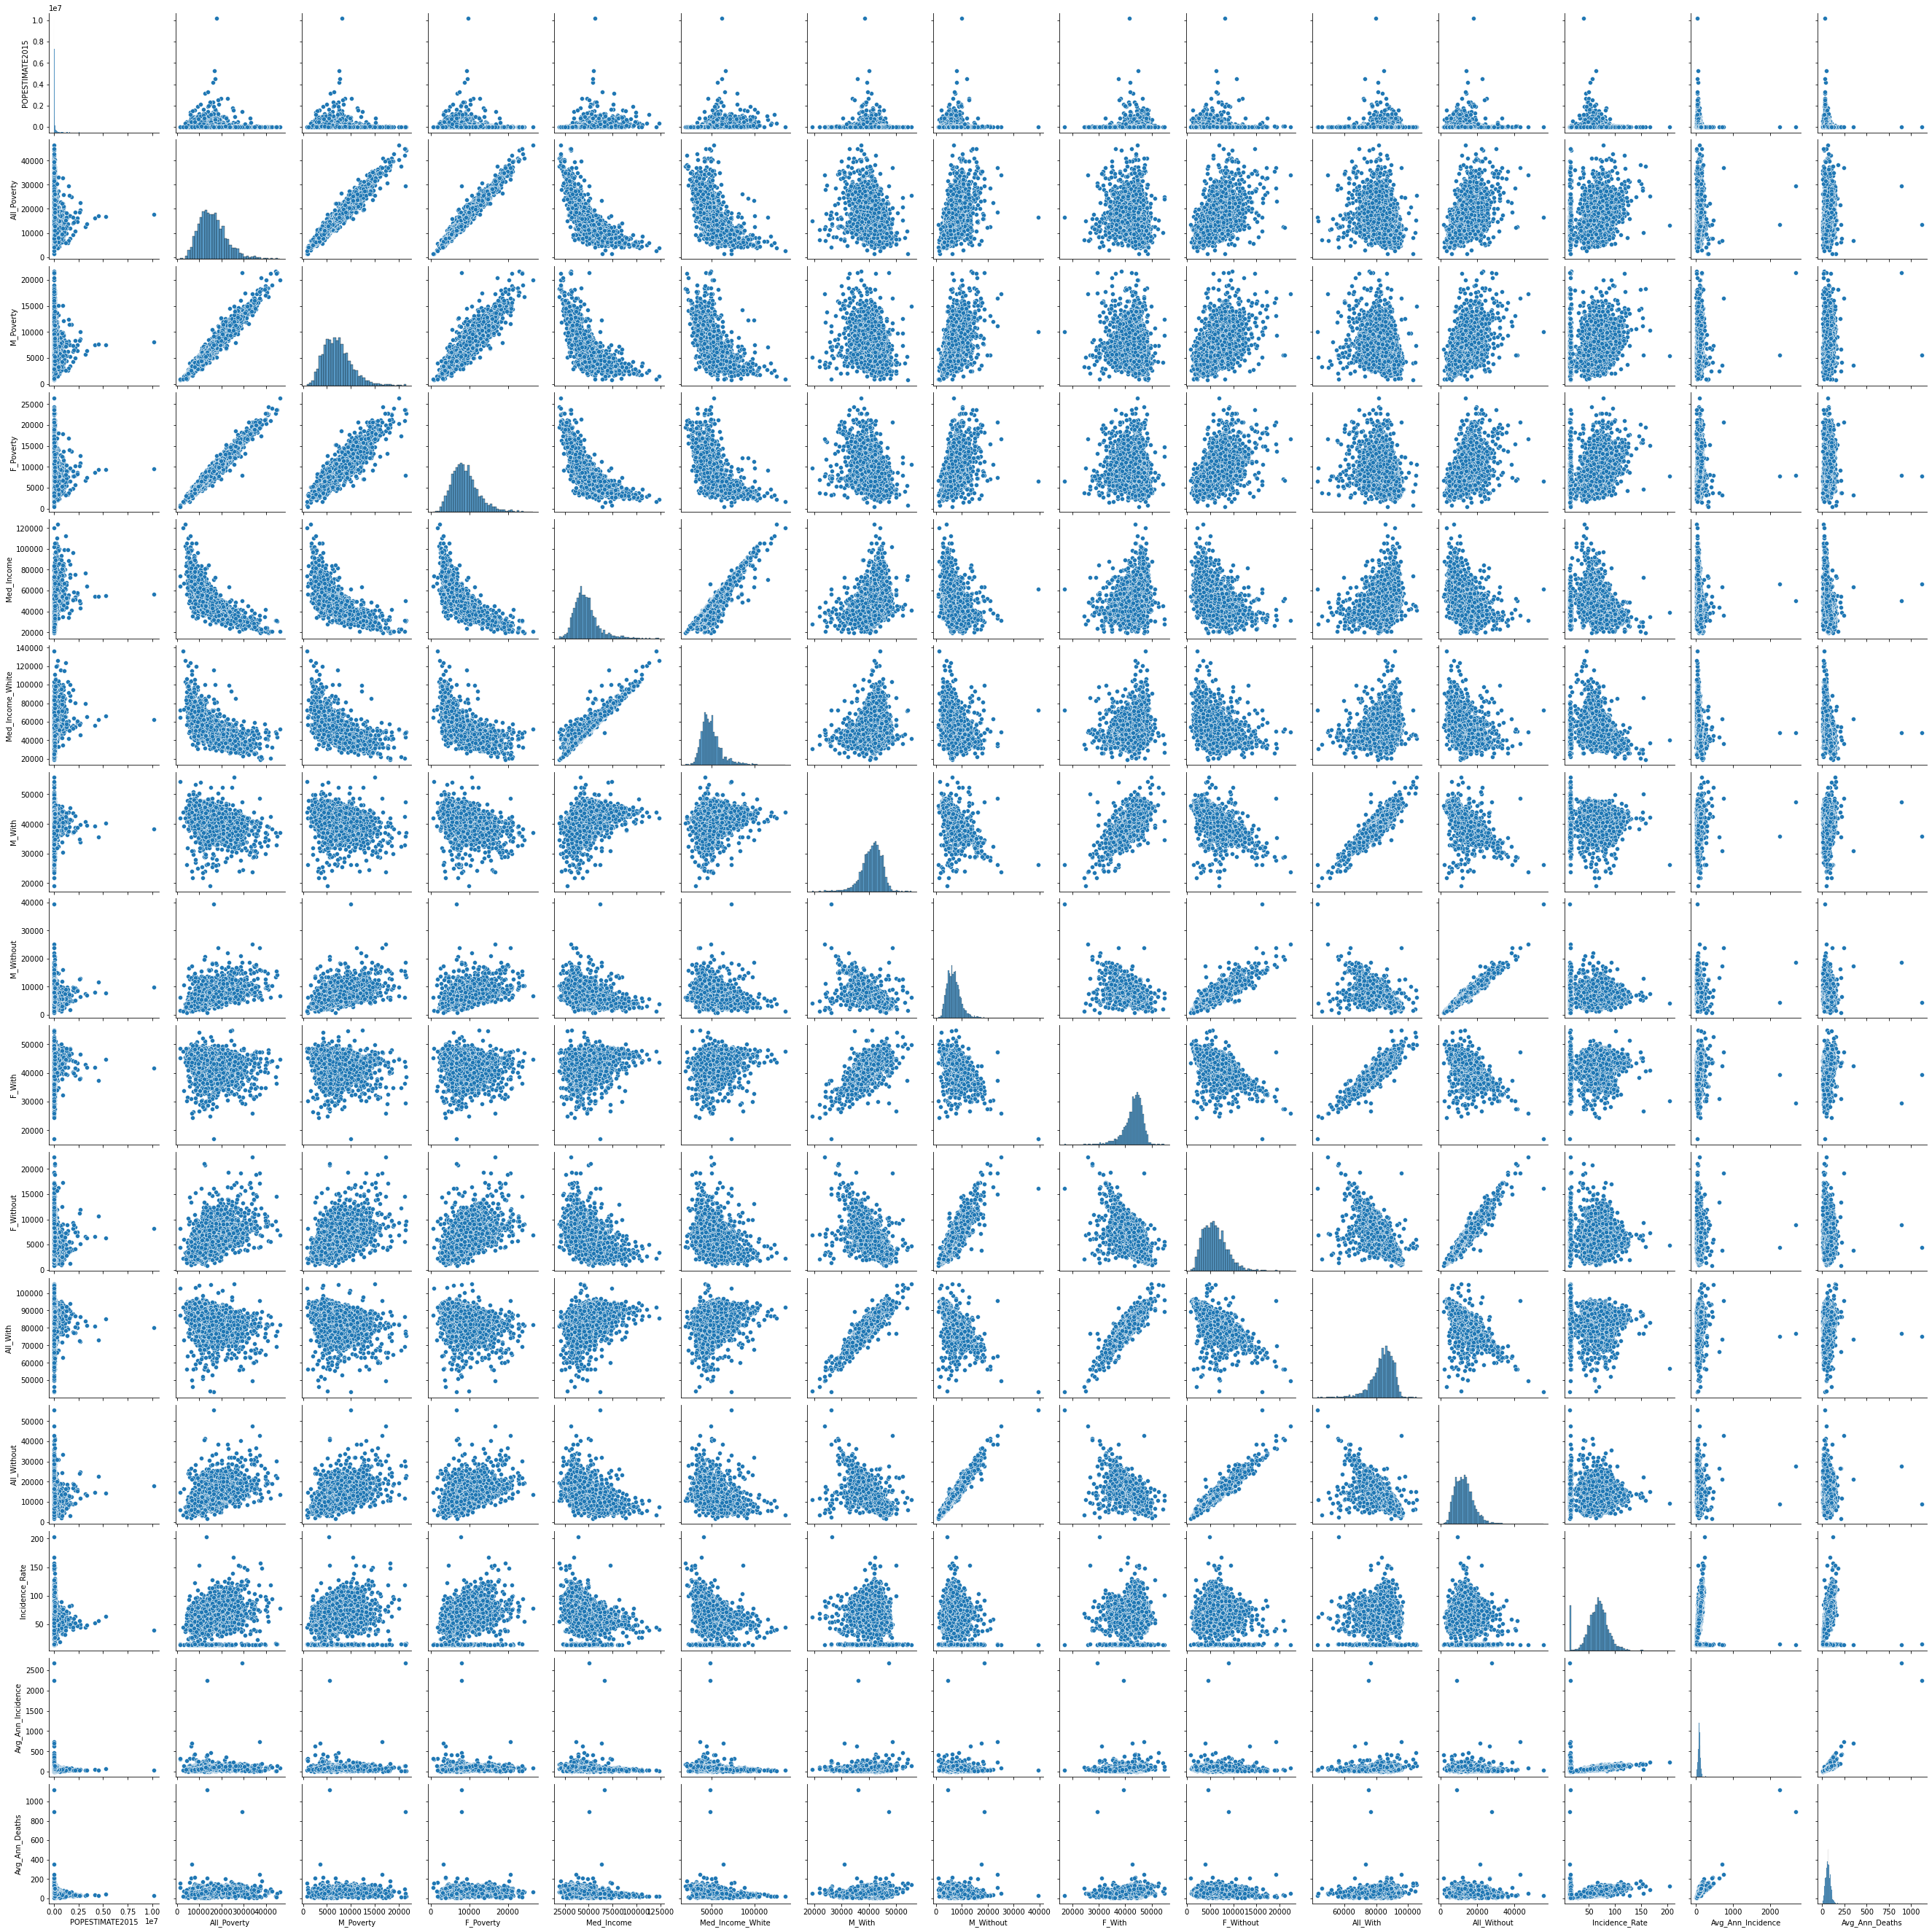

In [ ]:
# Plotting the pairplot
# Here we exclude the mortality rate as it is our response variable
sns.pairplot(mergedf, palette='Greens', vars = ['POPESTIMATE2015', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'Incidence_Rate', 'Avg_Ann_Incidence', 'Avg_Ann_Deaths'])
#             ['All_Poverty','Med_Income', 'All_With', 'All_Without', 'Incidence_Rate', 'Mortality_Rate'])

In [ ]:
# Now we also plot the correlation plot to understand more that what features are related to each other and what can be removed from our set of predcitors  

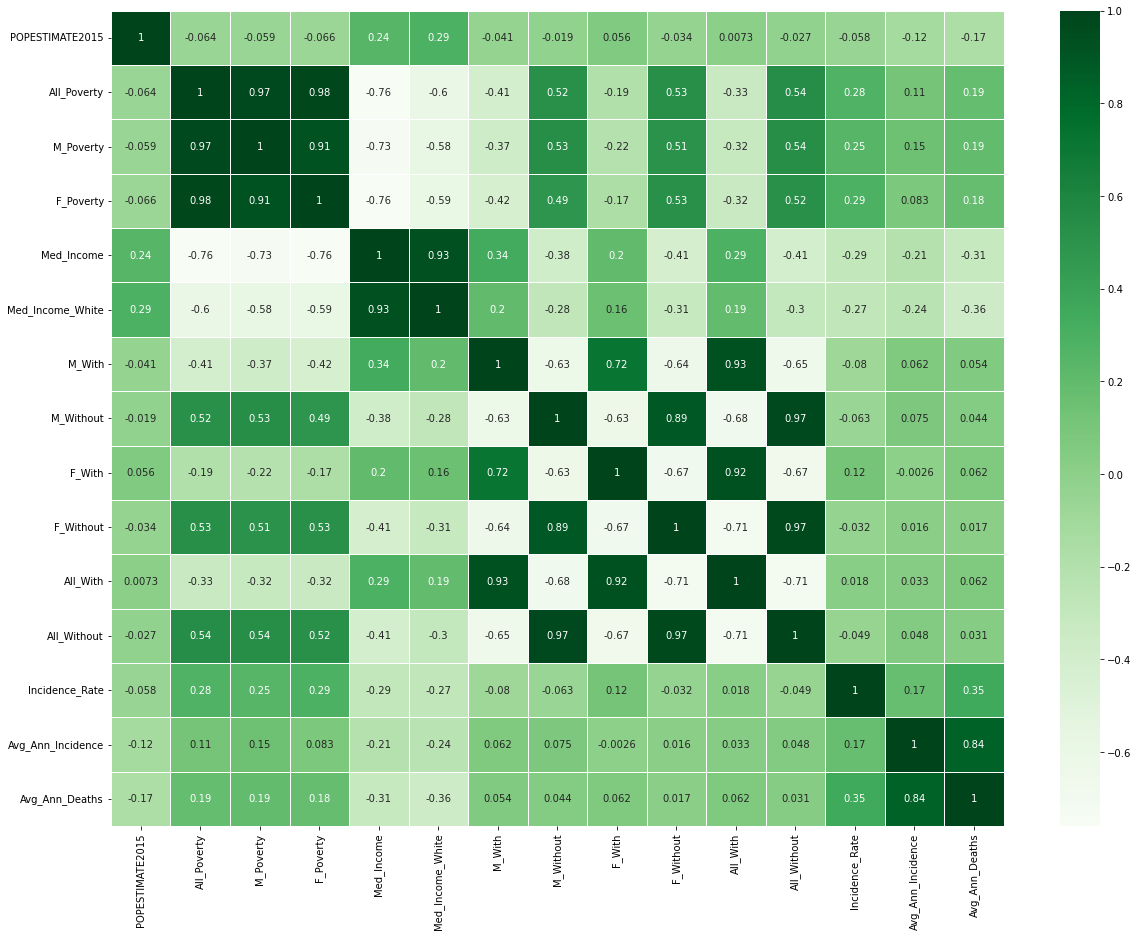

In [ ]:
mergedf_corr = mergedf[['POPESTIMATE2015', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'Incidence_Rate', 'Avg_Ann_Incidence', 'Avg_Ann_Deaths']]
corr = mergedf_corr.corr()
fig, ax = plt.subplots(figsize=(20, 15)) # Plot the correlation heatmap
sns.heatmap(corr, annot=True, cmap="Greens", linewidths=0.5) # Show the plot
plt.show()

2.2 Selecting the most important features [10 Marks]

In this step, we want to remove the redundant features.

Hint: This can be done by analyzing the correlation between the features and removing the highly correlated features. Remember, throughout the project, write down specific reasons for any desicion you make.

Based on the pairplot and the correlation plot analysis we decided to drop the following features:

['POPESTIMATE2015', 'All_Poverty', 'Med_Income_White', 'M_With', 'M_Without', 'F_With', 'F_Without', 'Avg_Ann_Incidence']

because they have high degree of correlation

Part 3: Regression Model Construction [30 Marks]

3.1 Splitting the dataset [5 Marks]

Split the dataset to three parts: train, validation, and test. You choose the ratios for the three datasets and provide a one-sentence rationale on why you went with such ratios.

Hint: You can use the validation set approach from ch5 lab (google colab).

In [ ]:
final = mergedf

In [ ]:
# Shuffle the dataset and reset the index
# We are going to do a 3-way split of the data to 60%, 20%, 20% 
# for training, validation, and test datasets respectively
final = final.sample(frac=1).reset_index(drop=True)
final.shape

(3088, 20)

In [ ]:
# Separate the last 20% as hold-out data (test data)
final_hold_out=final[int(0.8*len(final)):len(final)]
final_hold_out

,POPESTIMATE2015,FIPS,State,AreaName,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
2470,674836,34017,NJ,"Hudson County, New Jersey",17026,7449,9576,59741.0,61384.0,38294,10227,40378,8761,78672,18989,48.8,41,falling,36.5,30
2471,195080,55101,WI,"Racine County, Wisconsin",12183,5115,7068,55584.0,60923.0,42659,5132,46094,3903,88753,9035,69.5,78,stable,47.5,53
2472,25788,26043,MI,"Dickinson County, Michigan",13661,5774,7887,43779.0,44013.0,44152,5076,46661,3536,90813,8612,50.7,77,stable,46.5,73
2473,65065,08014,CO,"Broomfield County, Colorado",6040,2431,3608,81898.0,82961.0,42187,3760,44246,2580,86433,6341,48.4,35,stable,37.8,27
2474,1919,02068,AK,"Denali Borough, Alaska",13236,7243,5992,81544.0,81029.0,42834,13183,35122,13027,77957,26211,15.9,52,stable,11.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,114625,26005,MI,"Allegan County, Michigan",12375,5624,6750,54264.0,54439.0,44152,4614,45140,3905,89292,8519,53.7,61,stable,46.6,51
3084,40971,54099,WV,"Wayne County, West Virginia",20668,9692,10976,36318.0,36313.0,42737,6616,44599,7046,87337,13663,89.5,124,stable,64.2,87
3085,27052,22031,LA,"De Soto Parish, Louisiana",26094,11315,14778,41468.0,51319.0,40329,7016,43948,7803,84278,14819,80.7,99,stable,52.7,66
3086,20882,13091,GA,"Dodge County, Georgia",20491,9888,10602,34271.0,41636.0,35930,8662,40934,6469,76865,15132,81.3,95,stable,53.6,62


In [ ]:
# Keep the first 80% as training+validation data
final_train_val = final[0:int(0.8*len(final))]
final_train_val

,POPESTIMATE2015,FIPS,State,AreaName,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
0,6415,26095,MI,"Luce County, Michigan",16508,7061,9446,37088.0,38668.0,37957,5409,37957,3382,75915,8791,84.0,124,stable,56.7,93
1,45563,55005,WI,"Barron County, Wisconsin",12378,5745,6632,45714.0,45619.0,45021,4929,45523,3500,90544,8430,58.9,83,stable,47.1,68
2,26141,05071,AR,"Johnson County, Arkansas",21322,9532,11789,34139.0,35176.0,41226,7501,43521,6170,84748,13672,97.2,110,falling,67.9,76
3,1760,30019,MT,"Daniels County, Montana",5681,1704,3977,49239.0,49457.0,47954,2386,43068,4545,91022,6931,13.5,113,stable,12.8,56
4,23766,48365,TX,"Panola County, Texas",14764,5032,9732,50119.0,54003.0,39182,8911,42131,9505,81313,18417,70.7,88,stable,56.6,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,154708,27145,MN,"Stearns County, Minnesota",12649,5995,6654,56336.0,57938.0,45426,3637,46463,2355,91889,5992,46.5,49,stable,35.2,35
2466,56264,51067,VA,"Franklin County, Virginia",14437,6567,7870,46870.0,48167.0,42135,6641,44344,6384,86479,13026,53.1,74,falling,43.4,60
2467,13735,40063,OK,"Hughes County, Oklahoma",16337,7462,8875,35563.0,36758.0,33425,9282,35959,9464,69384,18747,88.5,123,stable,77.6,109
2468,8682,19117,IA,"Lucas County, Iowa",12969,6864,6104,43962.0,44635.0,44793,5021,45623,3593,90416,8615,60.1,92,stable,44.5,69


In [ ]:
## Randomly selecting 3/4 of the accessible samples as training data (60% of the total samples)
np.random.seed(1)
train = np.random.choice(final_train_val.shape[0], int(3*final_train_val.shape[0]/4), replace=False)
len(train)

1852

In [ ]:
mergedf.columns

Index(['POPESTIMATE2015', 'FIPS', 'State', 'AreaName', 'All_Poverty',
       'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'Recent_Trend', 'Mortality_Rate',
       'Avg_Ann_Deaths'],
      dtype='object')

In [ ]:
# We now start making the linear models based on the selected precitors
lm = smf.ols('Mortality_Rate ~ Med_Income + All_With + All_Without + Incidence_Rate + Avg_Ann_Deaths', data=mergedf).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1937.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:06:10   Log-Likelihood:                -11111.
No. Observations:                3088   AIC:                         2.223e+04
Df Residuals:                    3082   BIC:                         2.227e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8437      3.449      1.

In [ ]:
# Based on seeing the p value from the above model we removed All_With and All_Without due to higher p values 
lm1 = smf.ols('Mortality_Rate ~ Med_Income + Incidence_Rate + Avg_Ann_Deaths', data=mergedf).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     3229.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:15:19   Log-Likelihood:                -11112.
No. Observations:                3088   AIC:                         2.223e+04
Df Residuals:                    3084   BIC:                         2.226e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.1018      0.983      6.

In [ ]:
lm2 = smf.ols('Mortality_Rate ~ Med_Income + Incidence_Rate', data=mergedf).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     4700.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:25:57   Log-Likelihood:                -11147.
No. Observations:                3088   AIC:                         2.230e+04
Df Residuals:                    3085   BIC:                         2.232e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.9489      0.934      9.

In [ ]:
lm3 = smf.ols('Mortality_Rate ~ Med_Income + Incidence_Rate * Avg_Ann_Deaths', data=mergedf).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     2555.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:26:02   Log-Likelihood:                -11048.
No. Observations:                3088   AIC:                         2.211e+04
Df Residuals:                    3083   BIC:                         2.214e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
# Additional non linear transformation model
lm_extra = smf.ols('Mortality_Rate ~ Med_Income + Incidence_Rate + I(Incidence_Rate**2)', data=mergedf).fit()
print(lm_extra.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     3180.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:26:26   Log-Likelihood:                -11130.
No. Observations:                3088   AIC:                         2.227e+04
Df Residuals:                    3084   BIC:                         2.229e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

In [ ]:
# Calculating the Validation MSE for the 5 models

In [ ]:
import statsmodels.formula.api as smf
lm = smf.ols('Mortality_Rate ~ Med_Income + All_With + All_Without + Incidence_Rate + Avg_Ann_Deaths', data = final_train_val[select]).fit()
#print(lm.summary())
preds = lm.predict(final_train_val)
square_error = (final_train_val['Mortality_Rate'] - preds)**2
print('--------Validation MSE for linear regression model--------')
print('MSE:',np.mean(square_error[~select]))

--------Validation MSE for linear regression model--------
MSE: 59.25157743531648


In [ ]:
import statsmodels.formula.api as smf
lm1 = smf.ols('Mortality_Rate ~ Med_Income + Incidence_Rate + Avg_Ann_Deaths', data = final_train_val[select]).fit()
#print(lm.summary())
preds = lm1.predict(final_train_val)
square_error = (final_train_val['Mortality_Rate'] - preds)**2
print('--------Validation MSE for linear regression model--------')
print('MSE:',np.mean(square_error[~select]))

--------Validation MSE for linear regression model--------
MSE: 59.31982024507287


In [ ]:
import statsmodels.formula.api as smf
lm2 = smf.ols('Mortality_Rate ~ Med_Income + Incidence_Rate', data = final_train_val[select]).fit()
#print(lm.summary())
preds = lm2.predict(final_train_val)
square_error = (final_train_val['Mortality_Rate'] - preds)**2
print('--------Validation MSE for linear regression model--------')
print('MSE:',np.mean(square_error[~select]))

--------Validation MSE for linear regression model--------
MSE: 61.54092943149135


In [ ]:
import statsmodels.formula.api as smf
lm3 = smf.ols('Mortality_Rate ~ Med_Income + Incidence_Rate * Avg_Ann_Deaths', data = final_train_val[select]).fit()
#print(lm.summary())
preds = lm3.predict(final_train_val)
square_error = (final_train_val['Mortality_Rate'] - preds)**2
print('--------Validation MSE for linear regression model--------')
print('MSE:',np.mean(square_error[~select]))

--------Validation MSE for linear regression model--------
MSE: 58.12638142325478


In [ ]:
import statsmodels.formula.api as smf
lm_extra = smf.ols('Mortality_Rate ~ Med_Income + Incidence_Rate + I(Incidence_Rate**2)', data = final_train_val[select]).fit()
#print(lm.summary())
preds = lm_extra.predict(final_train_val)
square_error = (final_train_val['Mortality_Rate'] - preds)**2
print('--------Validation MSE for linear regression model--------')
print('MSE:',np.mean(square_error[~select]))

--------Validation MSE for linear regression model--------
MSE: 60.41706663155176


In [ ]:
# Based on these MSE values we see that the one with the interaction term (lm3) is the best performing model.

Part 4: Model diagnostics [10 marks]
Explore model collinearity with variance_inflation_factor. Larger values of VIF indicate multicollinearity. Remove the problematic features and refit the model. Report how model R-squared is affected.

Hint: Consider VIF > 10 as an indicator of multicollinearity. If the VIF for all your features is below 10, it is a positive indication that the level of collinearity is acceptably low without any changes to the model needed in this step.

In [ ]:
# Best model : lm3 = smf.ols('Mortality_Rate ~ Med_Income + Incidence_Rate * Avg_Ann_Deaths')
# VIF
X = mergedf[['Med_Income', 'Incidence_Rate', 'Avg_Ann_Deaths']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature       VIF
0      Med_Income  5.023129
1  Incidence_Rate  7.993364
2  Avg_Ann_Deaths  4.809858


In [ ]:
# Here we see that the VIF for all the features included in the model are less than 10. Thus there is no problem of multi-collinearity in the model.

Part 5: Reporting test performance [5 marks]

Report the MSE of the final regression model using the test set.

In [ ]:
# Using the test set (final_hold_out) we estimate the MSE for the test set
preds_hold_out = lm.predict(final_hold_out)
square_error_hold_out = (final_hold_out['Mortality_Rate'] - preds_hold_out)**2
print('--------Test MSE for linear regression model--------')
print('MSE:',np.mean(square_error_hold_out))

--------Test MSE for linear regression model--------
MSE: 78.7341069779368


# Part 6: Alternative predictive model (optional): [20 bonus points up to the maximum mark]

Use one other supervised learning model to outperform the regression model from part 5 (in terms of MSE) on the same hold-out test set. Document, justify, and explain all your decision w.r.t. the implementation of this alternative predictive model.

This part is deliberately designed without clear instructions as bonus points for efforts of groups in completing a very common ML task without a walkthrough or instrcutions.

We have used lasso regression to find out if it performs better than our lm3 model found through ols method. Lasso regression is a penalised regression method which generally peforms better than ols regression. Lasso penalises overfitting. We found that the lasso model does slightly better than the ols model in terms of MSE. We have used the same feature set and the same hold out data so that we can compare the MSE between these models.

In [ ]:
# LASSO model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Split the data into feature variables (X) and target variable
# Here we are using the same train and test data that we used earlier for the alternate models as well so that the performance can be compared
X_train = final_train_val[['Med_Income', 'Incidence_Rate', 'Avg_Ann_Deaths']]
y_train = final_train_val['Mortality_Rate']
X_test = final_hold_out[['Med_Income', 'Incidence_Rate', 'Avg_Ann_Deaths']]
y_test = final_hold_out['Mortality_Rate']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Create a Lasso Regression model and fit it to the training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = lasso.predict(X_test)

# Calculate the mean squared error between the predicted and actual values
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 78.6007612885213


We have further used random forest as another alternative model. Random forest can be used for classification and for regression. In our case as we are performing regression so accordingly we have used RandomForestRegressor to implement randomforest method. Random forests while having the simplicity of the decision trees do help to improve the accuracy of the prediction. Here the input for x is all the features/columns that we used in pairplot.For inputting value for the max_features we used squareroot of the number of features.We find that the MSE is the lowest in case of random forest.

In [ ]:
# as we move forward, it is good to keep the hyperparameters together for future iterations.
X = mergedf[['All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'Incidence_Rate', 'Avg_Ann_Incidence', 'Avg_Ann_Deaths']]
y = mergedf['Mortality_Rate']
train_size = 0.80 # we used specific train size before, we can also use a percentage. 
random_state = 0
max_depth = 3

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=random_state)

# here we'll use max_features = 3 (close to square root of all features as a rule of thumb)
regr_rf = RandomForestRegressor(max_features=4, random_state=2)
regr_rf.fit(X_train, y_train)

y_pred = regr_rf.predict(X_val)
print(mean_squared_error(y_val, y_pred))

68.16545579935276
